In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
 df = pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv')

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [5]:
df.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.shape

(1067, 13)

In [7]:
df[df.MODELYEAR != 2014]

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


In [8]:
df.drop('MODELYEAR',axis=1,inplace=True)

### Converting all the features into numerical values

In [9]:
df.MAKE.unique()

array(['ACURA', 'ASTON MARTIN', 'AUDI', 'BENTLEY', 'BMW', 'BUICK',
       'CADILLAC', 'CHEVROLET', 'CHRYSLER', 'DODGE', 'FIAT', 'FORD',
       'GMC', 'HONDA', 'HYUNDAI', 'INFINITI', 'JAGUAR', 'JEEP', 'KIA',
       'LAMBORGHINI', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI',
       'MAZDA', 'MERCEDES-BENZ', 'MINI', 'MITSUBISHI', 'NISSAN',
       'PORSCHE', 'RAM', 'ROLLS-ROYCE', 'SCION', 'SMART', 'SRT', 'SUBARU',
       'TOYOTA', 'VOLKSWAGEN', 'VOLVO'], dtype=object)

In [10]:
from sklearn.preprocessing import LabelEncoder
labelEnc = LabelEncoder()
labelEnc.fit_transform(df.MAKE)

array([ 0,  0,  0, ..., 38, 38, 38])

In [11]:
df.MAKE = labelEnc.fit_transform(df.MAKE)

In [12]:
labelEnc.fit_transform(df.MODEL)[:10]

array([329, 329, 330, 389, 483, 490, 578, 579, 579, 591])

In [13]:
len(df.MODEL.unique())

663

In [14]:
df.MODEL = labelEnc.fit_transform(df.MODEL)

In [15]:
df.VEHICLECLASS.unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'MINICOMPACT', 'SUBCOMPACT',
       'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

In [16]:
df.VEHICLECLASS = labelEnc.fit_transform(df.VEHICLECLASS)

In [17]:
df.TRANSMISSION.unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'A6', 'AM7', 'AV8', 'AS8', 'A7', 'A8',
       'M7', 'A4', 'M5', 'AV', 'A5', 'AM6', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5'], dtype=object)

In [18]:
df.TRANSMISSION = labelEnc.fit_transform(df.TRANSMISSION)

In [19]:
df.FUELTYPE.unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

In [20]:
labelEnc.fit_transform(df.FUELTYPE)

array([3, 3, 3, ..., 2, 2, 2])

In [21]:
df.FUELTYPE = labelEnc.fit_transform(df.FUELTYPE)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 12 columns):
MAKE                        1067 non-null int32
MODEL                       1067 non-null int32
VEHICLECLASS                1067 non-null int32
ENGINESIZE                  1067 non-null float64
CYLINDERS                   1067 non-null int64
TRANSMISSION                1067 non-null int32
FUELTYPE                    1067 non-null int32
FUELCONSUMPTION_CITY        1067 non-null float64
FUELCONSUMPTION_HWY         1067 non-null float64
FUELCONSUMPTION_COMB        1067 non-null float64
FUELCONSUMPTION_COMB_MPG    1067 non-null int64
CO2EMISSIONS                1067 non-null int64
dtypes: float64(4), int32(5), int64(3)
memory usage: 79.3 KB


# Visualization

### Heat Map

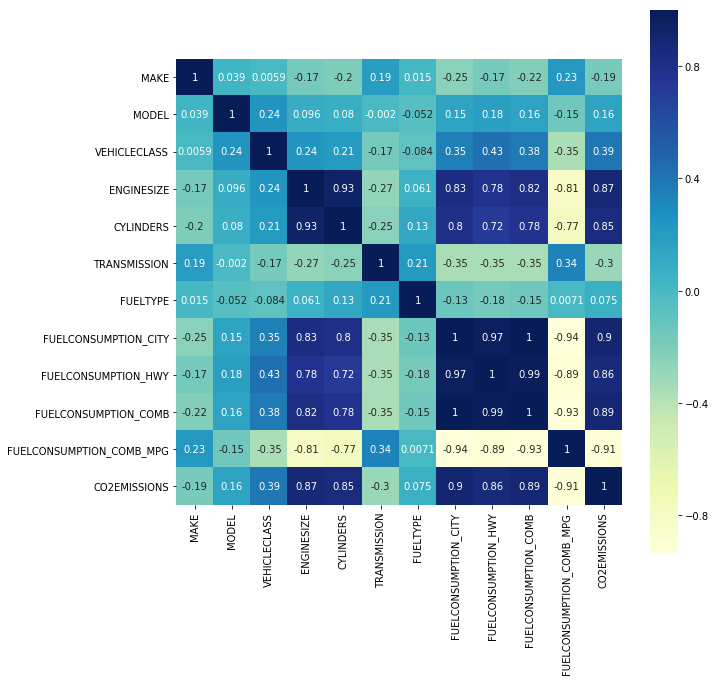

In [23]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,vmax=1,square=True,annot=True,cmap='YlGnBu')

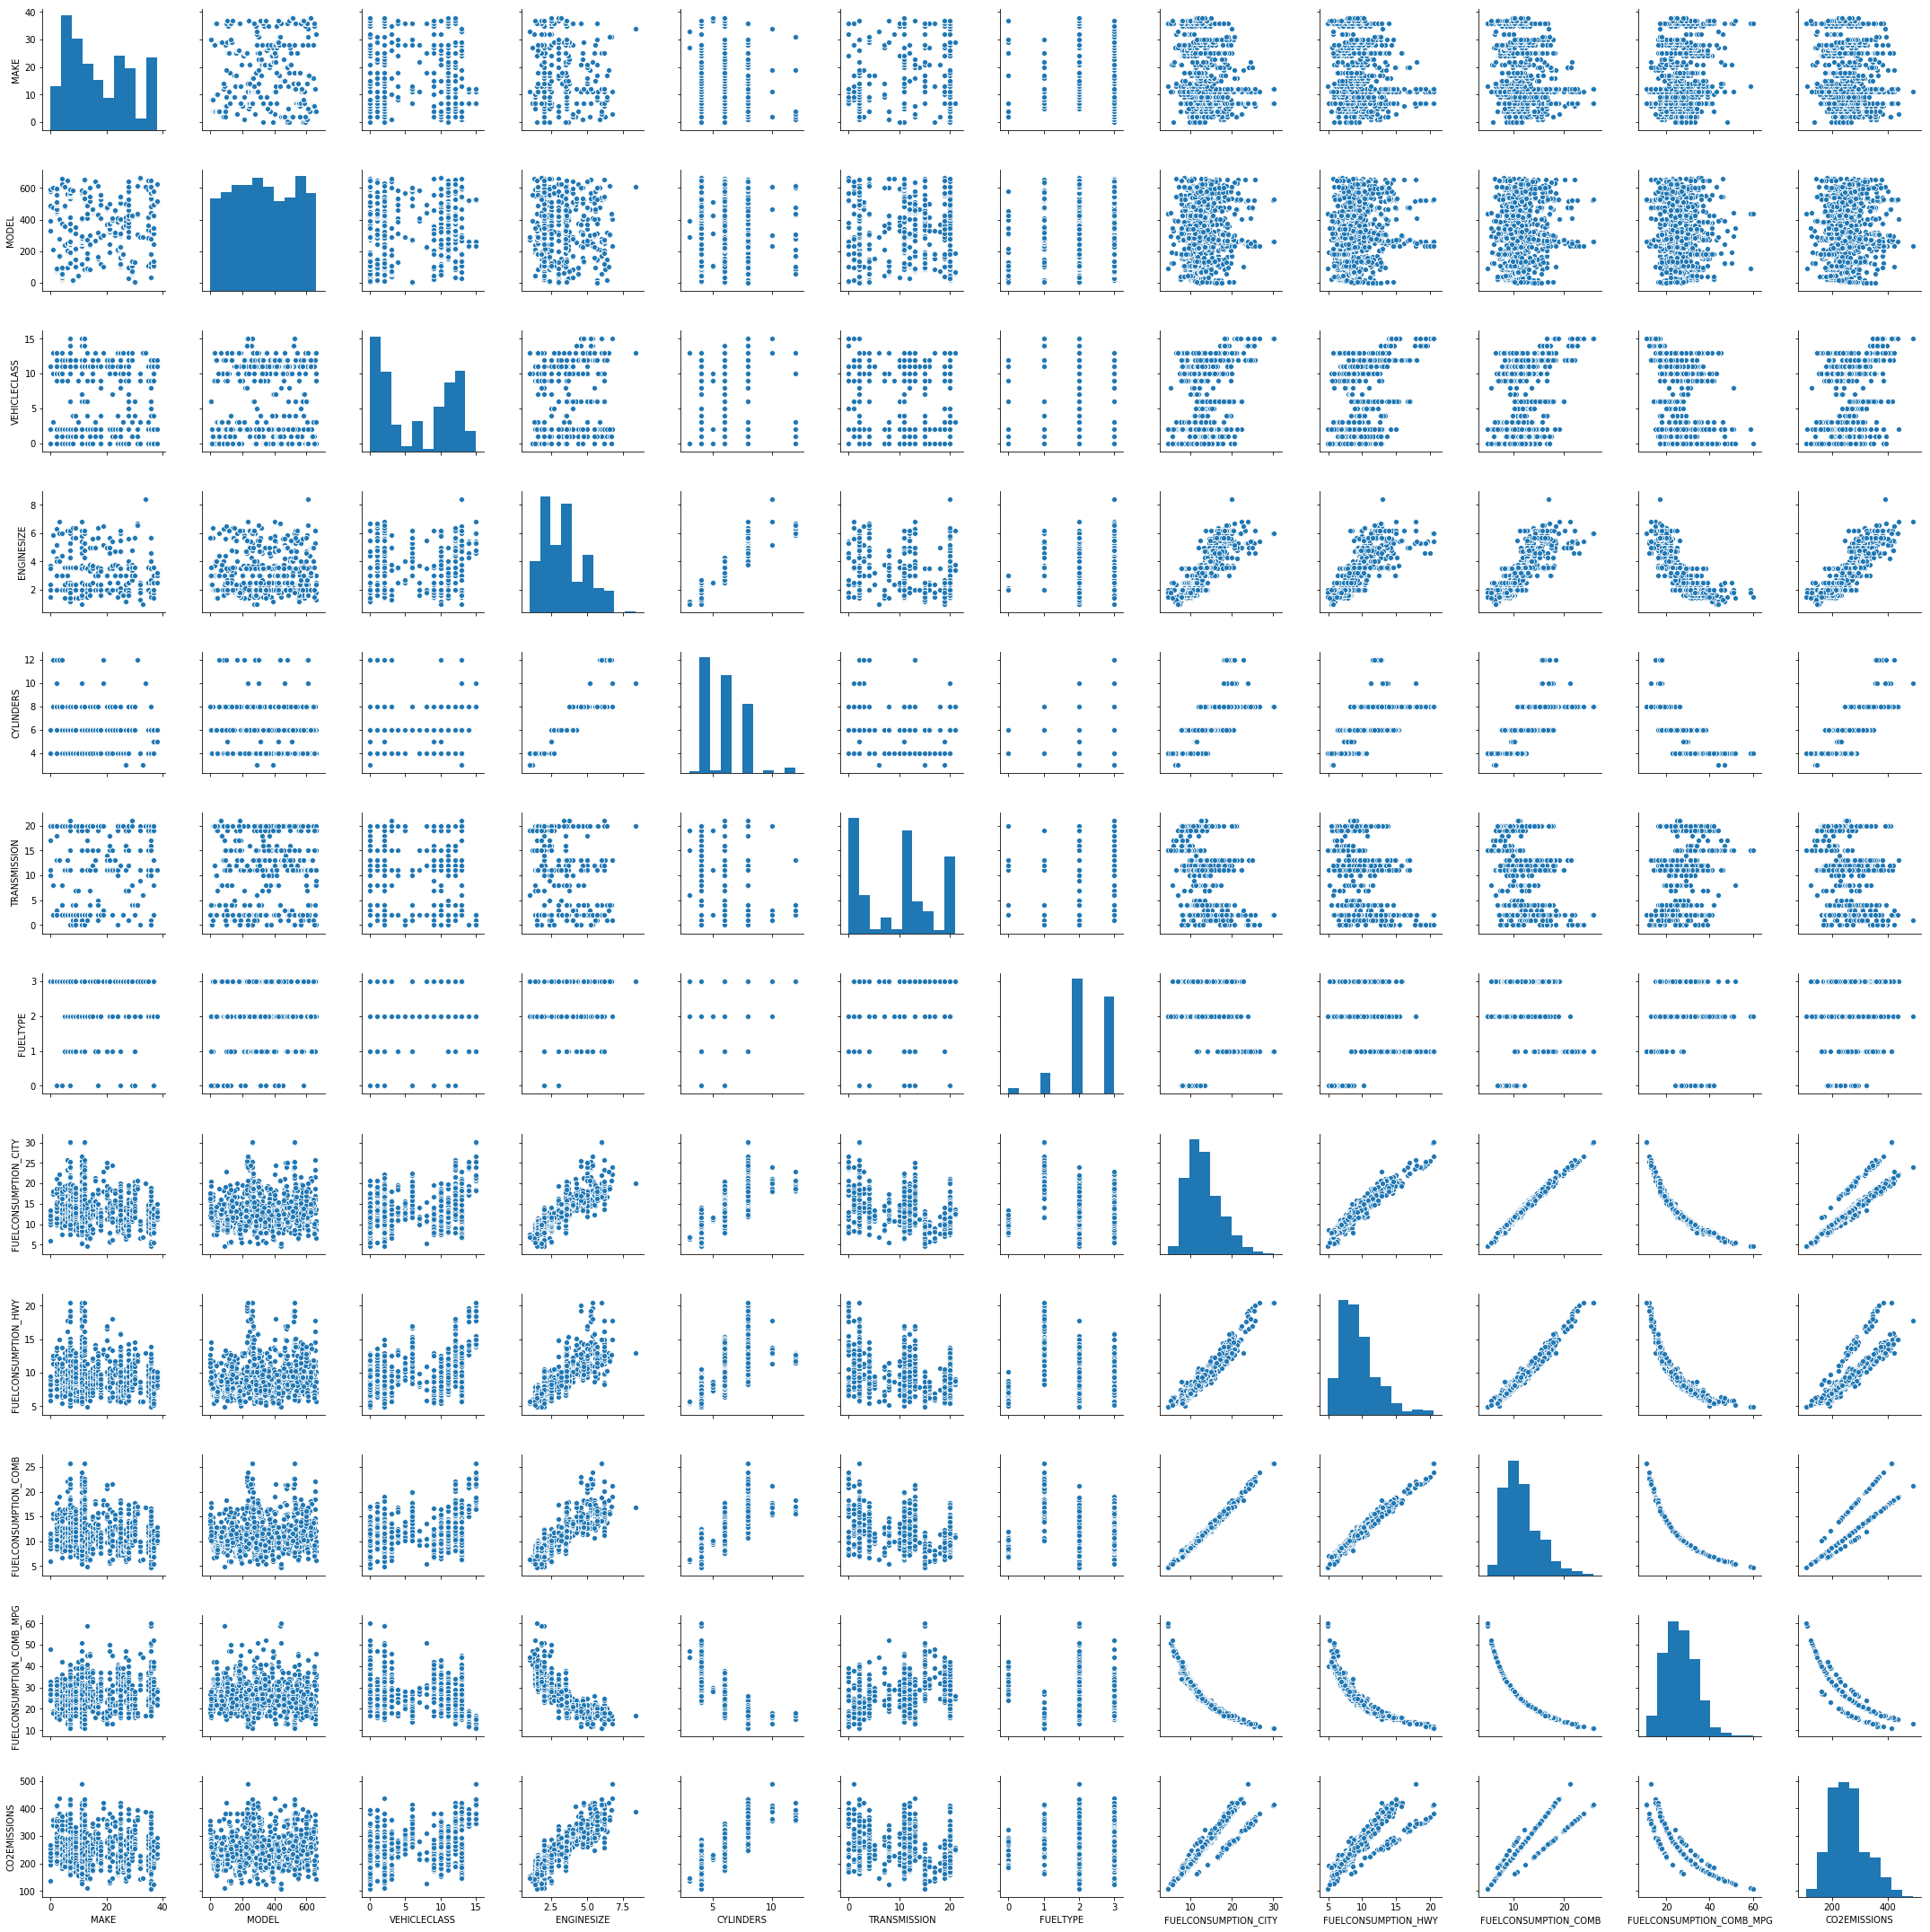

In [24]:
sns.pairplot(df)

In [25]:
from scipy import stats
pearson_coeff,p_value = stats.pearsonr(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'])
print('pearson_coeff :',pearson_coeff,'\np_value :',p_value)

pearson_coeff : 0.8921285933157566 
p_value : 0.0


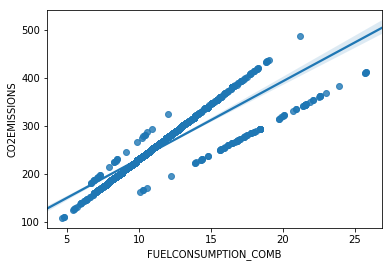

In [26]:
df2 = df[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
sns.regplot(df2.FUELCONSUMPTION_COMB, df2.CO2EMISSIONS)

In [27]:
pearson_coeff,p_value = stats.pearsonr(df['ENGINESIZE'], df['CO2EMISSIONS'])
print('pearson_coeff :',pearson_coeff,'\np_value :',p_value)

pearson_coeff : 0.8741543683958123 
p_value : 0.0


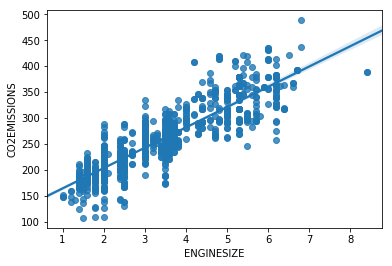

In [28]:
sns.regplot(df2.ENGINESIZE, df2.CO2EMISSIONS)

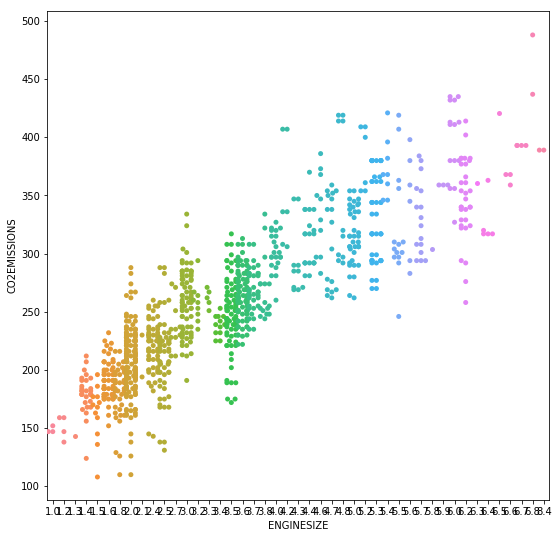

In [29]:
plt.figure(figsize=(9,9))
sns.swarmplot(x='ENGINESIZE',y='CO2EMISSIONS',data=df)

In [30]:
pearson_coeff,p_value = stats.pearsonr(df['CYLINDERS'], df['CO2EMISSIONS'])
print('pearson_coeff :',pearson_coeff,'\np_value :',p_value)

pearson_coeff : 0.8496845920141143 
p_value : 2.7709372039888274e-298


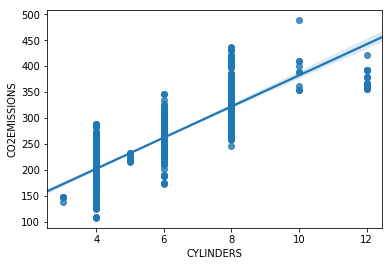

In [31]:
sns.regplot(df2.CYLINDERS,df2.CO2EMISSIONS)

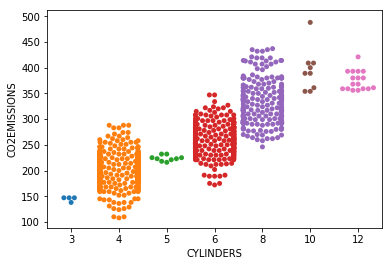

In [32]:
sns.swarmplot(x='CYLINDERS',y='CO2EMISSIONS',data=df)

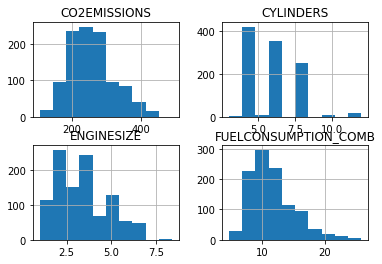

In [33]:
df2.hist()
plt.show()

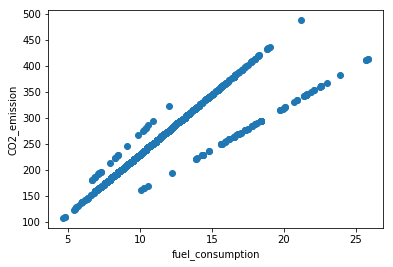

In [34]:
plt.scatter(df2.FUELCONSUMPTION_COMB, df2.CO2EMISSIONS)
plt.xlabel('fuel_consumption');plt.ylabel('CO2_emission');plt.show()

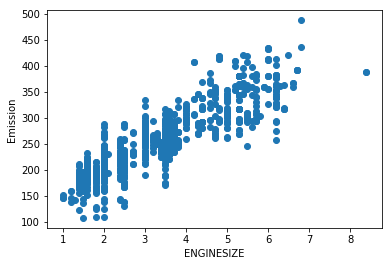

In [35]:
plt.scatter(df2.ENGINESIZE, df2.CO2EMISSIONS)
plt.xlabel("ENGINESIZE")
plt.ylabel("Emission")
plt.show()

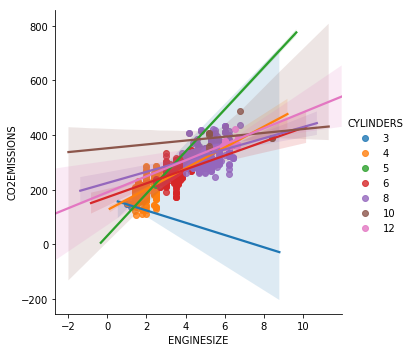

In [36]:
sns.lmplot('ENGINESIZE','CO2EMISSIONS',hue='CYLINDERS',data=df)

## -----------------------------------------------------------------------------------------------------------

In [37]:
#msk = np.random.rand(len(df)) < 0.8
#train = df2[msk]
#test = df2[~msk]

In [38]:
from sklearn.model_selection import train_test_split
features = df.drop('CO2EMISSIONS',axis=1)
labels = df.CO2EMISSIONS
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.3,random_state=1)

In [39]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
lm.intercept_

198.60518175767692

In [41]:
lm.coef_

array([ 5.76430653e-02,  5.43353580e-03,  1.09023515e+00,  1.03111145e+01,
        4.61558426e+00, -8.17010049e-02,  8.72731434e+00, -5.41407476e+00,
       -4.35961180e+00,  1.40750792e+01, -3.10071047e+00])

In [42]:
Yhat_lr = lm.predict(x_test)

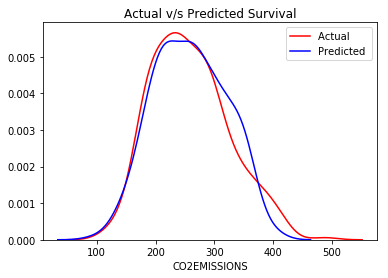

In [43]:
sns.distplot(y_test,hist=False,color='r',label='Actual ')
plt.title('Actual v/s Predicted Survival')
sns.distplot(Yhat_lr,hist=False,color='b',label='Predicted ')

In [44]:
print('MAE  : %.2f'%np.mean(np.absolute(Yhat_lr-y_test)))
print('MSE  : %.2f'%np.mean((Yhat_lr-y_test)**2))
print('RMSE : %.2f'%np.sqrt(np.mean((Yhat_lr-y_test)**2)))

MAE  : 14.58
MSE  : 441.61
RMSE : 21.01


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test,Yhat_lr)

0.8960999721433425